In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, Math, Latex
import math
pi=math.pi
import cmath

#import scipy
from scipy import special

In [35]:
D=2e-6
rho_p=1040
rho_f=998
k=11.478e-6
R=D/2.
kB=1.381e-23
deltaT=10
T0=293.15
eta=2.414e-5*10**(247.8/(T0-140))
rho_f=0.14395/(0.0112**(1+(1-T0/649.727)**0.05107))
drag=6*pi*eta*R
Diff_const=kB*T0/drag
V_p=4/3.*pi*R**3
M_p=rho_p*V_p
M_f=rho_f*V_p
M_eff=M_p+M_f/2
tau_p=M_p/(6*pi*eta*R)
tau_f=R**2*rho_f/eta
tau_k=drag/k

eta_inf = 0.02984e-3
T_VF = 152
theta = deltaT/(T0-T_VF)

#Thot=T0+deltaT
Thot=T0+5/12*deltaT+math.log(eta/eta_inf)/(22*(T0+deltaT-T_VF))*deltaT**2
etahot=2.414e-5*10**(247.8/(Thot-140))
rho_fhot=0.14395/(0.0112**(1+(1-Thot/649.727)**0.05107))
draghot=6*pi*etahot*R
#Diff_consthot=kB*Thot/drag
M_fhot=rho_fhot*V_p
M_effhot=M_p+M_fhot/2
tau_phot=M_p/(6*pi*etahot*R)
tau_fhot=R**2*rho_fhot/etahot
tau_khot=draghot/k

In [53]:
def VACF(time,tau_pin,tau_fin,tau_kin):
    polyCoefs=[tau_pin+tau_fin/9,-np.sqrt(tau_fin),1,0,1/tau_kin]
    polyRoots=np.roots(polyCoefs);
    z1=polyRoots[0]
    z2=polyRoots[1]
    z3=polyRoots[2]
    z4=polyRoots[3]
    fraction1=(z1-z2)*(z1-z3)*(z1-z4)
    fraction2=(z2-z1)*(z2-z3)*(z2-z4)
    fraction3=(z3-z1)*(z3-z2)*(z3-z4)
    fraction4=(z4-z1)*(z4-z2)*(z4-z3)
    term1=z1**3*special.wofz(1j*z1*np.sqrt(time))/fraction1
    term2=z2**3*special.wofz(1j*z2*np.sqrt(time))/fraction2
    term3=z3**3*special.wofz(1j*z3*np.sqrt(time))/fraction3
    term4=z4**3*special.wofz(1j*z4*np.sqrt(time))/fraction4
    return np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1+term2+term3+term4))

def ACF(time,tau_kin):
    return kB*T0*tau_kin/drag*np.exp(-time/tau_kin)

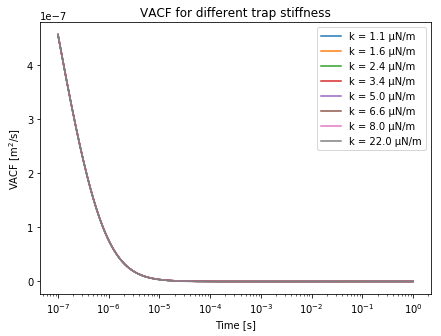

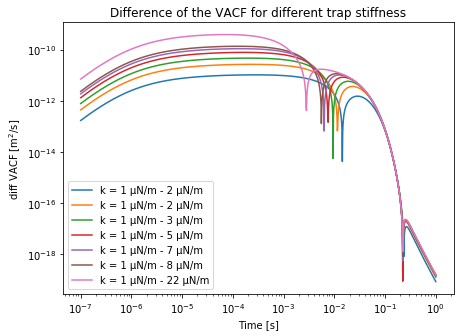

In [72]:
t = np.logspace(-7,0,num=1000)

kwave = [1.1*1e-6,1.6*1e-6,2.4*1e-6,3.4*1e-6,5.0*1e-6,6.6*1e-6,8.0*1e-6,22*1e-6]
#kwave = [1e-6,1e-5,1e-4,1e-3,1e-2]
VACFwave = np.zeros((1000,len(kwave)))

fig=plt.figure(1, figsize = (7,5) )
for i in range(len(kwave)):
    tau_kvar = drag/kwave[i]
    VACFwave[:,i] = VACF(t,tau_p,tau_f,tau_kvar)
    #plt.loglog(t,abs(VACFwave[:,i]),label = 'k = '+str(round(kwave[i]*1e6,1))+' µN/m')
    plt.semilogx(t,VACFwave[:,i],label = 'k = '+str(round(kwave[i]*1e6,1))+' µN/m')
plt.xlabel('Time [s]')
plt.ylabel('VACF [m$^2$/s]')
plt.title('VACF for different trap stiffness')
plt.legend()
plt.show()

fig=plt.figure(1, figsize = (7,5) )
for i in range(len(kwave)-1):
    plt.loglog(t,abs(VACFwave[:,0]-VACFwave[:,i+1]),label = 'k = '+str(round(kwave[0]*1e6))+' µN/m - '+ str(round(kwave[i+1]*1e6)) + ' µN/m')
plt.xlabel('Time [s]')
plt.ylabel('diff VACF [m$^2$/s]')
plt.title('Difference of the VACF for different trap stiffness')
plt.legend()
plt.show()

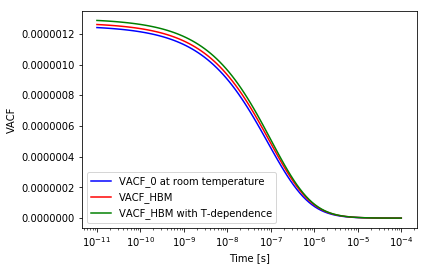

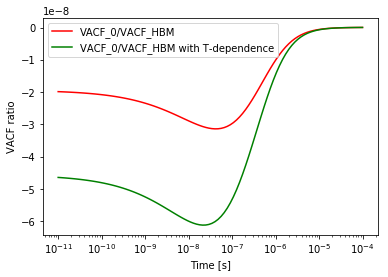

In [3]:
t = np.logspace(-11,-4,num=100)
time = np.zeros(100)
VACFhot = np.zeros(100)
VACFhotT = np.zeros(100)
VACFcold = np.zeros(100)
deltaVACF = np.zeros(100)
deltaVACF2 = np.zeros(100)
polyCoefscold=[tau_p+tau_f/9,-np.sqrt(tau_f),1,0,1/tau_k]
polyRootscold=np.roots(polyCoefscold);
z1cold=polyRootscold[0]
z2cold=polyRootscold[1]
z3cold=polyRootscold[2]
z4cold=polyRootscold[3]
fraction1cold=(z1cold-z2cold)*(z1cold-z3cold)*(z1cold-z4cold)
fraction2cold=(z2cold-z1cold)*(z2cold-z3cold)*(z2cold-z4cold)
fraction3cold=(z3cold-z1cold)*(z3cold-z2cold)*(z3cold-z4cold)
fraction4cold=(z4cold-z1cold)*(z4cold-z2cold)*(z4cold-z3cold)
polyCoefsn=[tau_phot+tau_fhot/9,-np.sqrt(tau_fhot),1,0,1/tau_khot]
polyRootsn=np.roots(polyCoefsn);
z1n=polyRootsn[0]
z2n=polyRootsn[1]
z3n=polyRootsn[2]
z4n=polyRootsn[3]
fraction1n=(z1n-z2n)*(z1n-z3n)*(z1n-z4n)
fraction2n=(z2n-z1n)*(z2n-z3n)*(z2n-z4n)
fraction3n=(z3n-z1n)*(z3n-z2n)*(z3n-z4n)
fraction4n=(z4n-z1n)*(z4n-z2n)*(z4n-z3n)
for i in range(100):
    time=t[i]
    term1cold=z1cold**3*special.wofz(1j*z1cold*np.sqrt(time))/fraction1cold
    term2cold=z2cold**3*special.wofz(1j*z2cold*np.sqrt(time))/fraction2cold
    term3cold=z3cold**3*special.wofz(1j*z3cold*np.sqrt(time))/fraction3cold
    term4cold=z4cold**3*special.wofz(1j*z4cold*np.sqrt(time))/fraction4cold
    VACFcold[i]=np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1cold+term2cold+term3cold+term4cold))
    
    term1n=z1n**3*special.wofz(1j*z1n*np.sqrt(time))/fraction1n
    term2n=z2n**3*special.wofz(1j*z2n*np.sqrt(time))/fraction2n
    term3n=z3n**3*special.wofz(1j*z3n*np.sqrt(time))/fraction3n
    term4n=z4n**3*special.wofz(1j*z4n*np.sqrt(time))/fraction4n
    VACFhot[i]=np.real(2*kB*Thot/k+2*kB*Thot/M_effhot*(term1n+term2n+term3n+term4n))
    
    T_omega=(3.2835e-4/(time**0.49039+5.5911e-4)+0.41594)*deltaT+T0
    eta_t=2.414e-5*10**(247.8/(T_omega-140))
    drag_t=6*pi*eta_t*R
    rho_f_t=0.14395/(0.0112**(1+(1-T_omega/649.727)**0.05107))
    tau_p_t=M_p/(6*pi*eta_t*R)
    tau_f_t=R**2*rho_f_t/eta_t
    tau_k_t=drag_t/k
    
    polyCoefs=[tau_p_t+tau_f_t/9,-np.sqrt(tau_f_t),1,0,1/tau_k_t]
    polyRoots=np.roots(polyCoefs)   
    z1=polyRoots[0]
    z2=polyRoots[1]
    z3=polyRoots[2]
    z4=polyRoots[3]
    fraction1=(z1-z2)*(z1-z3)*(z1-z4)
    fraction2=(z2-z1)*(z2-z3)*(z2-z4)
    fraction3=(z3-z1)*(z3-z2)*(z3-z4)
    fraction4=(z4-z1)*(z4-z2)*(z4-z3)
    term1=z1**3*special.wofz(1j*z1*np.sqrt(time))/fraction1
    term2=z2**3*special.wofz(1j*z2*np.sqrt(time))/fraction2
    term3=z3**3*special.wofz(1j*z3*np.sqrt(time))/fraction3
    term4=z4**3*special.wofz(1j*z4*np.sqrt(time))/fraction4 
    M_fhot=rho_f_t*V_p
    M_effhot_t=M_p+M_fhot/2
    VACFhotT[i]=np.real(2*kB*T_omega/k+2*kB*T_omega/M_effhot_t*(term1+term2+term3+term4))
  
plt.semilogx(t,VACFcold,'b',label='VACF_0 at room temperature')
plt.semilogx(t,VACFhot,'r',label='VACF_HBM')
plt.semilogx(t,VACFhotT,'g',label='VACF_HBM with T-dependence')
plt.xlabel('Time [s]')
plt.ylabel('VACF')
plt.legend()
plt.show()

deltaVACF=VACFcold-VACFhot
deltaVACF2=VACFcold-VACFhotT

plt.semilogx(t, deltaVACF,'r',label='VACF_0/VACF_HBM')
plt.semilogx(t, deltaVACF2,'g',label='VACF_0/VACF_HBM with T-dependence')
plt.xlabel('Time [s]')
plt.ylabel('VACF ratio')
plt.legend()
plt.show()